In [7]:
## Normal Setup stuff
%matplotlib inline
from __future__ import print_function
from fractions import Fraction  
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'sans-serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)
from __future__ import division ## Python 3.0 returns the quotient in decimal form 

## Variables

In [12]:
offset = 0.0  #Deadband offset across the X- Axis

t_pos = np.linspace(offset, 1, 1000) #Domain of EMG values 

max_pace = 6 #max pace value

b = np.linspace(1, 10, 10) #Sensitivity Exponential 

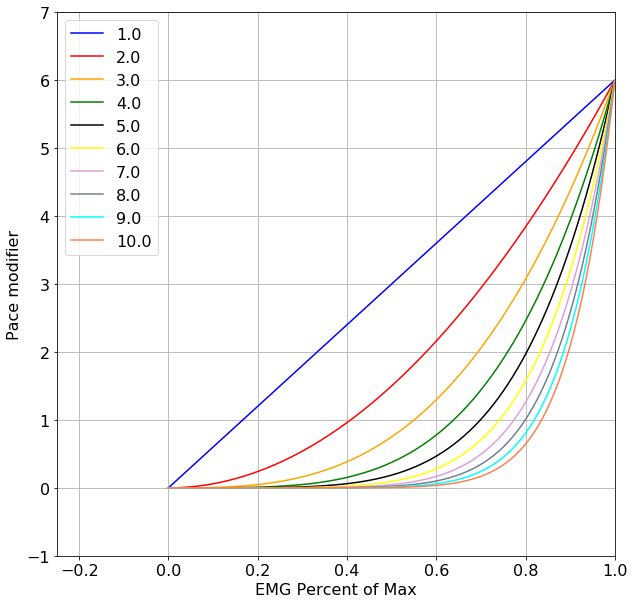

In [13]:
plt.figure(figsize=(10, 10))
plt.xlabel('EMG Percent of Max')
plt.ylabel('Pace modifier')
plt.xlim([-0.25,1])
plt.ylim([-1,7])
plt.grid()
plt.clf

graph_color = ["blue", "red","orange","green","black","yellow","plum","slategrey","cyan", "coral"]
for i in range(len(b)):
#     f1 =  max_pace * (t_pos-offset) ** b[i]
    f1 =  max_pace * (t_pos) ** b[i]
#     f2 = -max_pace * t_neg ** b[i]
    plt.plot(t_pos, f1, color = graph_color[i])
#     plt.plot(t_neg, f2, color = graph_color[i])
    
plt.legend(b)

# for i in range(len(b)):
# #     f1 =  max_pace * t_pos ** b[i]
#     f2 = -max_pace * t_neg ** b[i]
# #     plt.plot(t_pos, f1, color = graph_color[i])
#     plt.plot(t_neg, f2, color = graph_color[i])

In [9]:
def f(m, b):
    plt.figure(2)
    x = np.linspace(-1, 1, num=10)
    plt.plot(x, b * np.exp( m * x ) - b * np.exp(-m * x))
    plt.ylim(-100, 100)
    plt.show()

interactive_plot = interactive(f, m=(-10.0, 10.0, 0.05), b=(-10, 10, 0.05))
output = interactive_plot.children[-1]
# output.layout.height = '500px'
interactive_plot

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuMCwgZGVzY3JpcHRpb249dSdtJywgbWF4PTEwLjAsIG1pbj0tMTAuMCwgc3RlcD0wLjA1KSwgRmxvYXRTbGlkZXIodmHigKY=


\begin{align}
a & = Pace incrementor \\
b & = Sensitivity Adjustor \\
x & = Observed Intenet, Percent of Max EMG\\
\end{align}


$$ y(x)=  \left\{
\begin{array}{ll}
      -ax^b  & a > 0,b> 0, -1 <= x >= 0 \\
        ax^b & a > 0,b> 0,  Offset <= x >= 1,\\      
\end{array} 
\right. $$ 

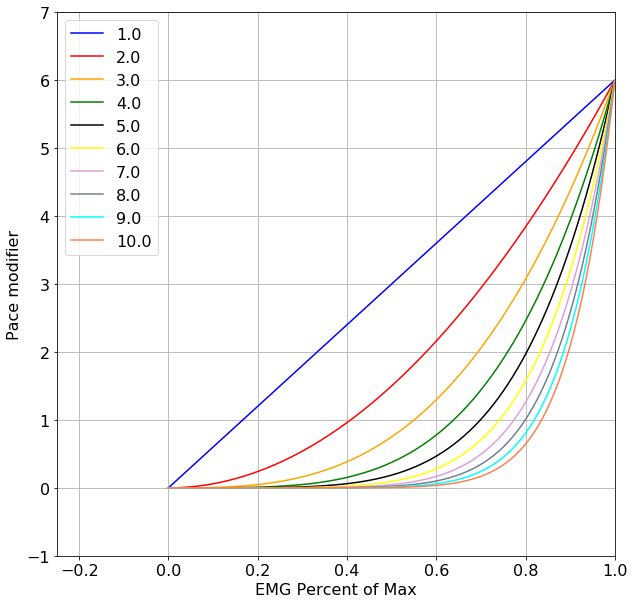

In [10]:
offset = 0.0

t_pos = np.linspace(offset, 1, 1000)
t_neg = np.linspace(-1, offset, 1000)
max_pace = 6
b = np.linspace(1, 10, 10)


plt.figure(figsize=(10, 10))
plt.xlabel('EMG Percent of Max')
plt.ylabel('Pace modifier')
plt.xlim([-0.25,1])
plt.ylim([-1,7])
plt.grid()
plt.clf

graph_color = ["blue", "red","orange","green","black","yellow","plum","slategrey","cyan", "coral"]
for i in range(len(b)):
#     f1 =  max_pace * (t_pos-offset) ** b[i]
    f1 =  max_pace * (t_pos) ** b[i]
#     f2 = -max_pace * t_neg ** b[i]
    plt.plot(t_pos, f1, color = graph_color[i])
#     plt.plot(t_neg, f2, color = graph_color[i])
    
plt.legend(b)

# for i in range(len(b)):
# #     f1 =  max_pace * t_pos ** b[i]
#     f2 = -max_pace * t_neg ** b[i]
# #     plt.plot(t_pos, f1, color = graph_color[i])
#     plt.plot(t_neg, f2, color = graph_color[i])



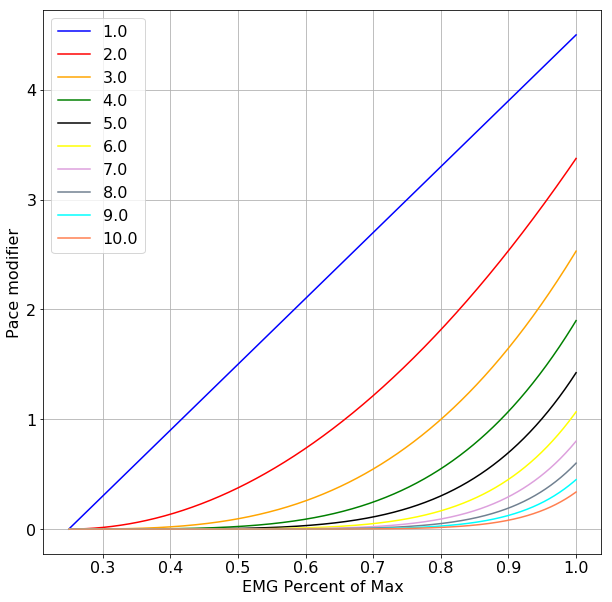

In [11]:
offset = 0.25

t_pos = np.linspace(offset, 1, 1000)
t_neg = np.linspace(-1, offset, 1000)
max_pace = 6
b = np.linspace(1, 10, 10)


plt.figure(figsize=(10, 10))
plt.xlabel('EMG Percent of Max')
plt.ylabel('Pace modifier')
# plt.xlim([-0.25,1])
# plt.ylim([-1,7])
plt.grid()
plt.clf

graph_color = ["blue", "red","orange","green","black","yellow","plum","slategrey","cyan", "coral"]
for i in range(len(b)):
#     f1 =  max_pace * (t_pos-offset) ** b[i]
    f1 =  (max_pace * ((t_pos-offset) ** b[i]) )
#     f2 = -max_pace * t_neg ** b[i]
    plt.plot(t_pos, f1, color = graph_color[i])
#     plt.plot(t_neg, f2, color = graph_color[i])
    
plt.legend(b)

# for i in range(len(b)):
# #     f1 =  max_pace * t_pos ** b[i]
#     f2 = -max_pace * t_neg ** b[i]
# #     plt.plot(t_pos, f1, color = graph_color[i])
#     plt.plot(t_neg, f2, color = graph_color[i])

